In [145]:
import theano
import theano.tensor as T
import theano.tensor.nnet as nnet
import numpy as np
import time

import cv2 
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import signal
import time
from math import sqrt
from skimage import transform
import skimage 

In [146]:
def prepImg(fileName, scale):
    img = cv2.imread(fileName, 0)
    kernel = np.ones((5,5),np.float32)/25
    dst = cv2.filter2D(img,-1,kernel)
    img_rescaled = get_rescaled(dst, scale)    
    return img_rescaled

def get_rescaled(img, percent):
    width, height = img.shape
    resized = skimage.transform.resize(img, output_shape=[int(width * percent), 
                int(height * percent)], order=1, mode='constant', cval=0, clip=True, preserve_range=False)
    return resized

In [147]:
M2 = cv2.imread("./training/preprocess/img0_M2.jpg", 0)
combine = cv2.imread("./training/preprocess/img0_combined.jpg", 0)

In [148]:
combine1 = combine / 255

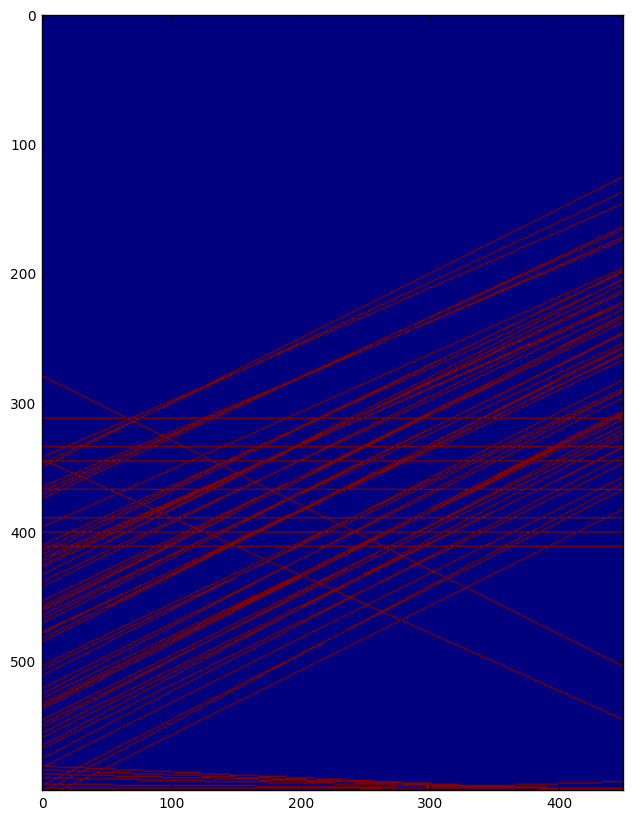

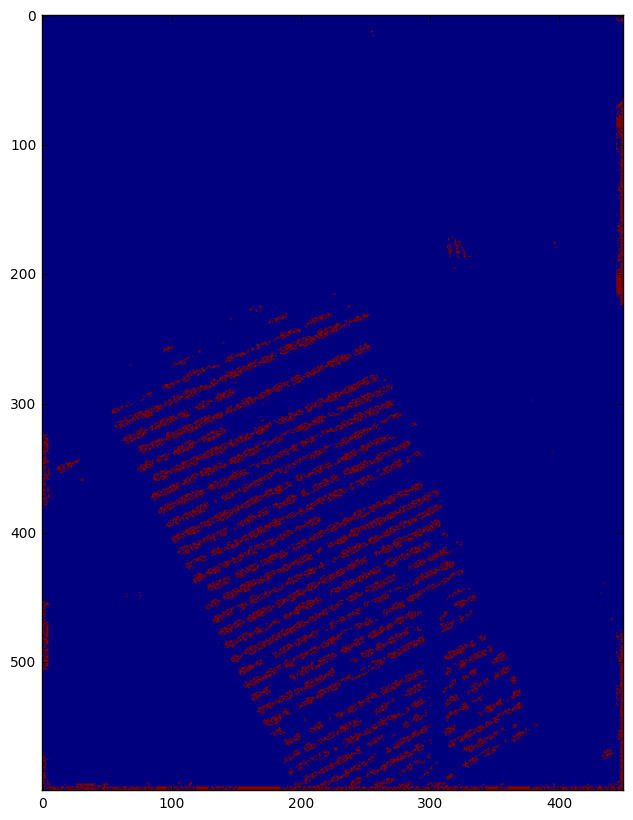

In [149]:


def findLines(maxAngl, minAngl, img):
    lines = cv2.HoughLines(img, rho = 1.1, theta = np.pi/360, threshold = 100)
    empty = np.ones((600, 450))
    output = []
    
    for item in lines:
        for rho, theta in item:
            if theta < maxAngl and theta > minAngl:
                a = np.cos(theta)
                b = np.sin(theta)
                x0 = a*rho
                y0 = b*rho
                x1 = int(x0 + 1000*(-b))
                y1 = int(y0 + 1000*(a))
                x2 = int(x0 - 1000*(-b))
                y2 = int(y0 - 1000*(a))
                cv2.line(empty,(x1,y1),(x2,y2),(255,255,255),1)
                output.append([rho, theta])
                
    plt.figure(num=None, figsize=(10, 10), dpi=200, facecolor='w', edgecolor='k')
    plt.imshow(empty)    
    plt.figure(num=None, figsize=(10, 10), dpi=200, facecolor='w', edgecolor='k')
    plt.imshow(img)
    
    return output

maxAngl = np.pi/2 + np.pi/6
minAngl = np.pi/2 -np.pi/6

lines = findLines(maxAngl, minAngl, combine1)

In [151]:
print len(lines)
print lines[0][0]

def calcCrossing(line1, line2):
    # equation for line from rho and theta
#     theta1 = line1[0]
#     rho1 = 
#     x = cos(theta)
#     y = sin(theta)
#     x1, y1 = 
    
    return [x, y]

# calculate k value
for idx in range(len(lines)):
    rho = lines[idx][0]
    theta = lines[idx][1]
    k = np.pi/2 - theta 
    k = np.sin(theta)/np.cos(theta)
    print theta
#     k = cos()

crossings = []
for idx in range(len(lines)):
    for idx2 in range(idx, len(lines)):
        line1 = lines[idx1]
        line2 = lines[idx2]
        crossings.append(calcCrossing(line1, line2))
        

69
598.95
1.5708
1.57952
1.16064
1.14319
1.10828
1.13446
1.58825
1.16064
1.10828
1.13446
1.15192
1.14319
1.10828
1.12574
1.13446
1.16937
1.10828
1.09083
1.09083
1.10828
1.12574
1.09956
1.12574
1.12574
1.11701
1.11701
1.12574
1.59698
1.10828
1.5708
1.10828
1.10828
1.10828
1.13446
1.13446
1.09083
1.10828
1.13446
1.0821
1.09956
1.11701
1.09956
1.10828
1.11701
1.12574
1.09956
1.10828
1.15192
1.09956
1.5708
1.5708
1.5708
1.10828
1.10828
1.6057
1.09956
1.16064
1.0821
1.11701
1.12574
1.09956
1.11701
1.5708
1.5708
1.5708
2.03331
1.54462
1.61443
1.98968


NameError: name 'idx1' is not defined